In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

%matplotlib inline

In [41]:
df = pd.read_csv('out.csv',header=0)

#crime.columns= ['Date','freq']
#weather = pd.read_csv('weather_monthly.txt')
#crime_lst = list(crime['freq'])[60:]
#temp_lst= list(weather[' Temp'])[:-13]
#spd_lst = list(weather[' Spd'])[:-13]
df_clean = df[df['bike'].notnull()]
#df_clean =df.drop(df.columns[0], axis=1)
df_clean.to_csv('bike_crime_temp.csv')
df_clean.head()

,Unnamed: 0,Date,freq,Spd,Visb,Temp,Prcp,SD,SDW,bike
29,29,2013/06,41823,4.96,13934.75,20.81,0.56,3.0,0.0,577702.0
30,30,2013/07,44689,4.46,14564.63,25.65,0.16,3.0,0.0,843417.0
31,31,2013/08,44487,4.33,15270.47,23.17,0.24,3.0,0.0,1001958.0
32,32,2013/09,43234,4.31,15024.12,19.67,0.14,3.0,0.0,1034359.0
33,33,2013/10,44751,4.67,14942.28,15.56,0.03,3.0,0.0,1037712.0


In [42]:

cols_dff=df_clean.shape[1]
                                            
comp_spearman = df_clean.corr(method="spearman").iloc[1:cols_dff,cols_dff:]
comp_pearson = df_clean.corr(method="pearson").iloc[1:cols_dff,cols_dff:]
print(comp_spearman)
print(comp_pearson)

Empty DataFrame
Columns: []
Index: [freq,  Spd,  Visb,  Temp,  Prcp,  SD,  SDW, bike]
Empty DataFrame
Columns: []
Index: [freq,  Spd,  Visb,  Temp,  Prcp,  SD,  SDW, bike]


In [43]:
print(spearmanr(list(df_clean['freq']),list(df_clean['bike'])))
print(np.corrcoef(list(df_clean['freq']),list(df_clean['bike'])))


SpearmanrResult(correlation=0.57127755964965266, pvalue=6.3092122345832492e-05)
[[ 1.          0.59457147]
 [ 0.59457147  1.        ]]


In [44]:
print(spearmanr(list(df_clean[' Temp']),list(df_clean['bike'])))
print(np.corrcoef(list(df_clean[' Temp']),list(df_clean['bike'])))

SpearmanrResult(correlation=0.74826336454243425, pvalue=8.0180234694918124e-09)
[[ 1.          0.76676905]
 [ 0.76676905  1.        ]]


In [45]:
print(spearmanr(list(df_clean[' Spd']),list(df_clean['bike'])))
print(np.corrcoef(list(df_clean[' Spd']),list(df_clean['bike'])))

SpearmanrResult(correlation=-0.57805303198046531, pvalue=4.919645980031989e-05)
[[ 1.         -0.58425681]
 [-0.58425681  1.        ]]


In [46]:
print(spearmanr(list(df_clean[' Prcp']),list(df_clean['bike'])))
print(np.corrcoef(list(df_clean[' Prcp']),list(df_clean['bike'])))

SpearmanrResult(correlation=-0.30306013807213744, pvalue=0.048214820753329862)
[[ 1.         -0.29328709]
 [-0.29328709  1.        ]]


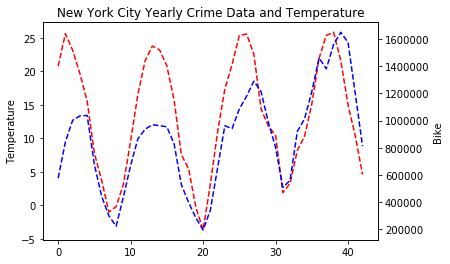

In [47]:
y1= list(df_clean[' Temp'])
y2 = list(df_clean['bike'])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(y1,'r-',linestyle='--')
ax1.set_ylabel('Temperature')
ax2 = ax1.twinx()
ax2.plot(y2,'b-',linestyle='--')
ax2.set_ylabel('Bike')

plt.title("New York City Yearly Crime Data and Temperature")

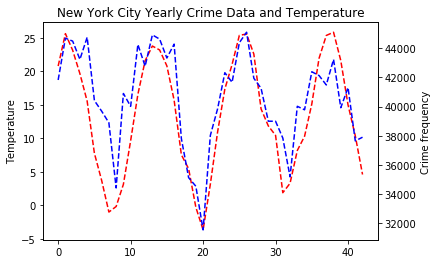

In [48]:
y1= list(df_clean[' Temp'])
y2 = list(df_clean['freq'])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(y1,'r-',linestyle='--')
ax1.set_ylabel('Temperature')
ax2 = ax1.twinx()
ax2.plot(y2,'b-',linestyle='--')
ax2.set_ylabel('Crime frequency')

plt.title("New York City Yearly Crime Data and Temperature")